# 🧠 Titanic Survival Prediction using Machine Learning

---

## 📌 Objective  
To predict whether a passenger survived the Titanic disaster using historical data and apply classification models to solve this binary problem.

---

## 🧾 Dataset Overview  
- Source: [Kaggle - Titanic: Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data)
- Target column: `Survived` (0 = No, 1 = Yes)
- Features: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, etc.

---

## 📊 Exploratory Data Analysis (EDA)


### ✅ Load Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import nbformat

### ✅ Load Dataset

In [3]:
train_data = pd.read_csv('../Titanic Survival Prediction/titanic/train.csv')
train_data.head()
test_data = pd.read_csv('../Titanic Survival Prediction/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### ✅ Basic Info

In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [5]:
train_data.describe()
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0, 0.5, 'Count')

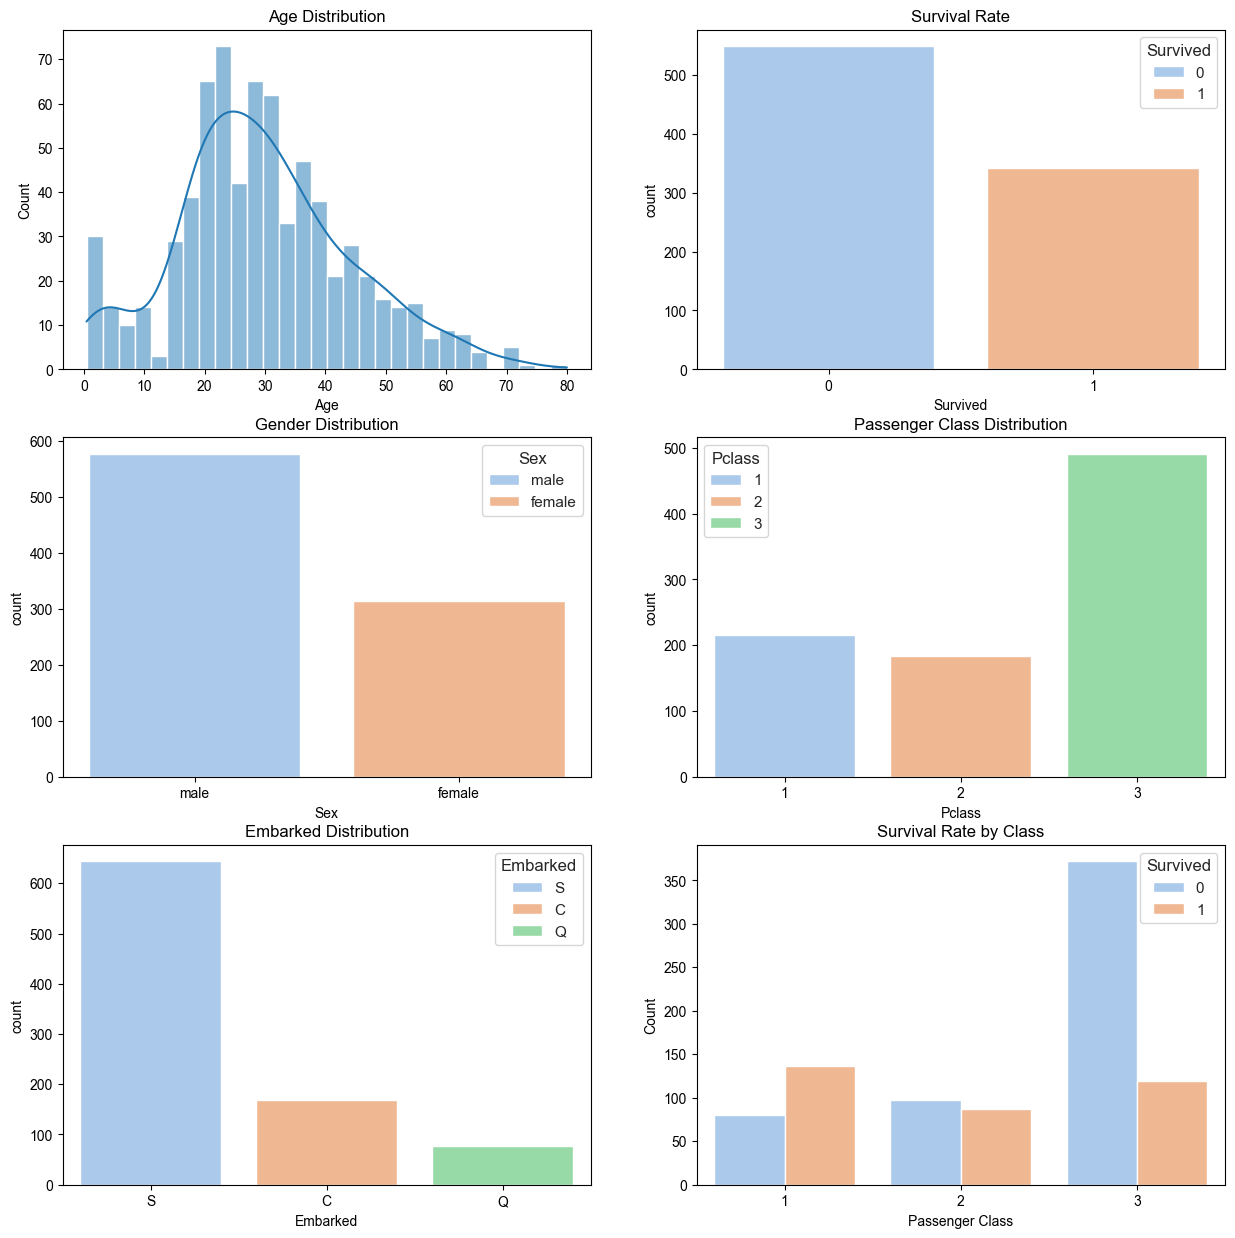

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Set a consistent style
sns.set_theme(style="whitegrid")
# Age Distribution 
fig = sns.histplot(data=train_data, x='Age', bins=30, kde=True, ax=axes[0, 0])
fig.set_title('Age Distribution')
# Survival Rate
fig = sns.countplot(data=train_data, x='Survived',hue='Survived',palette='pastel', ax=axes[0, 1])
fig.set_title('Survival Rate')
#Gender Distribution
fig = sns.countplot(data=train_data, x='Sex', hue='Sex', palette='pastel', ax=axes[1, 0], legend=True)
fig.set_title('Gender Distribution')
# Passenger Class Distribution
fig = sns.countplot(data=train_data, x='Pclass', hue='Pclass', palette='pastel', ax=axes[1, 1], legend=True)
fig.set_title('Passenger Class Distribution')
# Embarked Distribution
fig = sns.countplot(data=train_data, x='Embarked', hue='Embarked', palette='pastel', ax=axes[2, 0], legend=True)
fig.set_title('Embarked Distribution')
#Survival Rate by class 
fig = sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='pastel', ax=axes[2, 1], legend=True)
fig.set_title('Survival Rate by Class')
fig.set_xlabel('Passenger Class')
fig.set_ylabel('Count')

## Interpretation:
1. **Age Distribution**: This plot showing that, the majority of passengers are between 20 and 40 years old. there are fewer children and elder passenger.
---
2. **Survival Rate**: More passengers did not survive the Titanic Disaster compare to those who did. This also highlight the imbalance class in the target variable which we will further consider in next step for building a better predicting model.
---
3. **Gender Distribution**:We can see that, there are more male passengers than female passengers, this could be revalent for survival analysis, as gender might influence survival rates.
---
4. **Passenger Class Distribution**: Most passengers are in the third class, followed by first and second classes, this indicates that, the Titanic had a significant number of lower-class passengers.
---
5. **Embarked Distribution**:Most passengers embarked from port **S(Southapton)**, followed by **C(Cherrbourg)**, and **Q(Queenstown)**, this provide a useful information for understanding passenger demographics and survival trends.
---
6. **Survival Rate by Class**: First-class passenger had a higher survival rate compared to second and third-class passengers. Third-class had the lowest surval rate, indicating that class played a significant role in survival. 

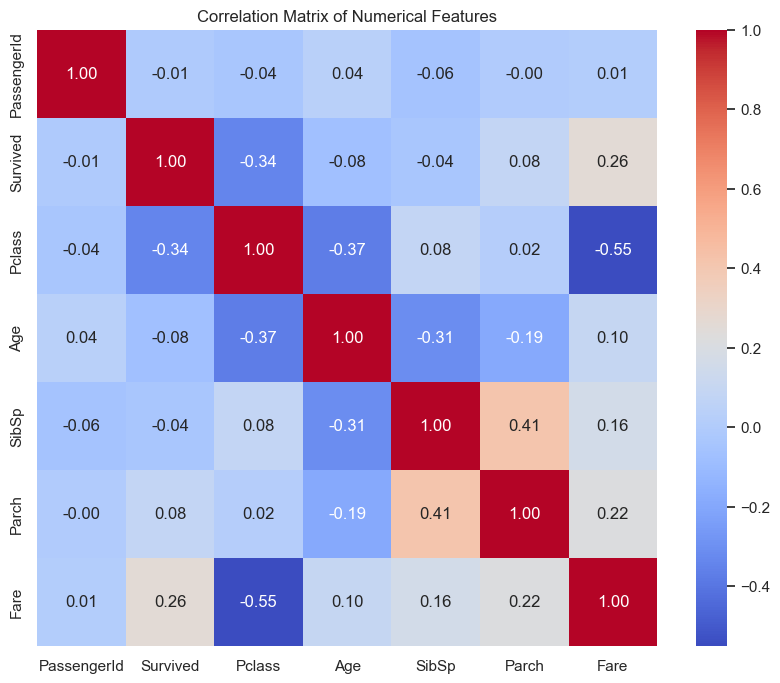

In [7]:
# Select only numerical columns
numerical_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Interpretation
--- 
**Survived vs. Pclass**: Strong negative correlation, indicating passengers in higher classes (lower Pclass values) were more likely to survive.

**Survived vs. Fare**: Positive correlation, showing that passengers who paid higher fares had better survival chances.

**Survived vs. Age**: Weak negative correlation, suggesting younger passengers had slightly higher survival rates.

**Pclass vs. Fare**: Strong negative correlation, as higher-class passengers paid higher fares.

---

# 🚀 Data Cleaning & Feature Engineering

## 📌 Objectives
- Identify and handle missing values
- Engineer meaningful new features
- Encode categorical variables
- Prepare the final dataset for model training

---

## 🔍 Check for Missing Values
We start by identifying columns that contain missing values and visualizing them.

In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Insight***
After running the above code, we can clearly see that there are 3 columns of training data that containing missing values which we will need to deal with before feed our data into model. 

## 🧼 Handling Missing Values
### 🎯 Age:

we fill missing age values using median group by *__Pclass__* and *__Sex__*

In [9]:
train_data['Age']=train_data['Age'].fillna(train_data.groupby(['Pclass','Sex'])['Age'].transform('median'))

### 🎯Cabin :

There are too many missing values and consider that this feature will contributes for model training ,drop for now.

In [10]:
train_data.drop(columns=['Cabin'], inplace=True)

### 🎯 Embarked:
Filled with the __mode__ (most frequent value).

In [11]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# 🧠 Feature Engineering



In [12]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt','Col', 'Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


### 👨‍👩‍👧‍👦 Create FamilySize Feature

In [13]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

### 🧍 Create IsAlone Feature

In [14]:
train_data['IsAlone']= (train_data['FamilySize'] == 1).astype(int)

### 🧩 Encoding Categorical Features

In [15]:
from sklearn.preprocessing import LabelEncoder

for cols in ['Sex', 'Embarked', 'Title']:
    label = LabelEncoder()
    train_data[cols] = label.fit_transform(train_data[cols])

### 🧪 Final Feature Selection

In [16]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']
X = train_data[features]
y = train_data['Survived']

# 🚀 Model Building & Evaluation

## 📌 Objectives
- Train classification models to predict survival
- Evaluate model performance using metrics and visualization
- Compare multiple models and select the best one

---


## 🧪 Train-Test Split

We will split our data into training and validation sets.

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🤖 Train Multiple Models
let's train multiple models and compare their performance:
1. Logistic Regression
2. Random Forest
3. Gradient Boosting
4. Support Vector Machine (SVM)
5. k-Nearest Neighbors (KNN)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# 🧠 Fit Models & Evaluate

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,f1_score, roc_auc_score

result = []
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    recall = recall_score(y_val,y_pred)
    f1 = f1_score(y_val,y_pred)
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    result.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    })

    print(f"\n{model_name}:\n")
    print(classification_report(y_val, y_pred))


LogisticRegression:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179


GradientBoostingClassifier:

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       

## 📊 Model Evaluation Results

After training five classification models, here's the performance comparison based on precision, recall, and F1-score:

| Model                   | Accuracy | Precision (0/1) | Recall (0/1) | F1-Score (0/1) |
|------------------------|----------|------------------|---------------|----------------|
| **Logistic Regression**      | 0.81     | 0.82 / 0.79     | 0.88 / 0.70    | 0.85 / 0.74     |
| **Random Forest**           | 0.81     | 0.83 / 0.78     | 0.87 / 0.71    | 0.85 / 0.74     |
| **Gradient Boosting**       | 0.79     | 0.80 / 0.78     | 0.88 / 0.65    | 0.84 / 0.71     |
| **SVM**                     | 0.61     | 0.64 / 0.50     | 0.85 / 0.23    | 0.73 / 0.32     |
| **KNN**                     | 0.66     | 0.72 / 0.57     | 0.75 / 0.52    | 0.73 / 0.55     |

---

## ✅ Interpretation

- **Best Performing Models**:
  - **Logistic Regression** and **Random Forest** performed best, with an overall accuracy of **81%**.
  - Both had balanced performance between precision and recall for both classes.
  - **Gradient Boosting** also performed decently with slightly lower recall on class `1`.

- **Underperformers**:
  - **SVM** struggled with predicting survivors (class `1`) – low recall and F1-score.
  - **KNN** had moderate performance but not better than logistic or tree-based models.

- **Next Steps**:
  - Use Random Forest or Logistic Regression as the base model for further tuning.
  - Consider addressing the **class imbalance** (survival class `1` is fewer) using techniques like:
    - Class weights
    - Oversampling (e.g. SMOTE)
    - Undersampling

---



# 📅 Model Improvement & Optimization

## 🎯 Objectives:
- Handle class imbalance in the dataset.
- Improve model performance through:
  - Class weighting
  - Resampling techniques (SMOTE or RandomUnderSampler)
- Tune hyperparameters of the best model (Random Forest / Logistic Regression).

---


### Handle Class Imbalance
- 📊 Check class distribution again (`value_counts()`).
- ⚖️ Try these two approaches:

   **SMOTE** – Synthetic Minority Over-sampling Technique


In [21]:
y.value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

### ⚖️ Apply Balancing Techniques

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


### Hyperparameter Tuning
#### 🔧 Random Forest - Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200,300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_resampled, y_resampled)
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

Best parameters for Random Forest: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


#### 🧪 Logistic Regression - Grid Search

In [ ]:
param_grid_lr = {
    'tol': [1e-4, 1e-3, 1e-2, 1e-5],
    'max_iter': [1000],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced']
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42), 
    param_grid_lr, 
    cv=5, 
    scoring='accuracy', 
    verbose=1
)
grid_lr.fit(X_resampled, y_resampled)
print(f"Best parameters for Logistic Regression: {grid_lr.best_params_}")


# 📊 Evaluate Improved Model

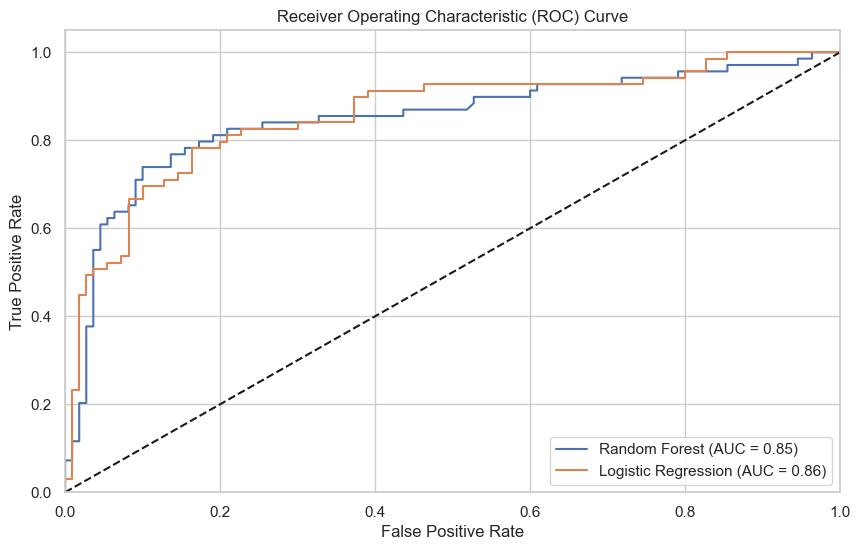

In [25]:
from sklearn.metrics import roc_curve, auc,classification_report, ConfusionMatrixDisplay
y_pred_rf = grid_rf.predict(X_val)
y_pred_proba_rf = grid_rf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)
y_pred_lr = grid_lr.predict(X_val)
y_pred_proba_lr = grid_lr.predict_proba(X_val)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
# Plotting ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
print(f"Random Forest Classification Report:\n{classification_report(y_val, y_pred_rf)}")
print(f"Logistic Regression Classification Report:\n{classification_report(y_val, y_pred_lr)}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



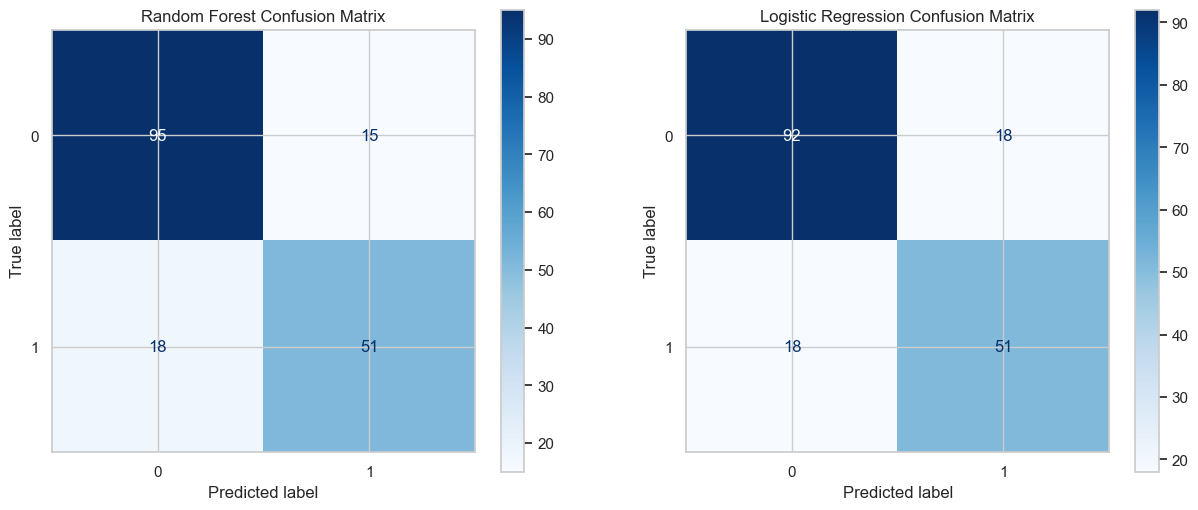

In [27]:
#Confusion Matrix 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
cm_rf = ConfusionMatrixDisplay.from_estimator(grid_rf, X_val, y_val, ax=ax[0], cmap='Blues')
cm_rf.ax_.set_title('Random Forest Confusion Matrix')
cm_lr = ConfusionMatrixDisplay.from_estimator(grid_lr, X_val, y_val, ax=ax[1], cmap='Blues')
cm_lr.ax_.set_title('Logistic Regression Confusion Matrix')
plt.show()

## 📊 Model Performance Summary

| Metric                    | 🔁 Random Forest       | 📈 Logistic Regression   |
|--------------------------|------------------------|--------------------------|
| **Accuracy**             | 0.82                   | 0.80                     |
| **AUC Score**            | 0.85                   | 0.86 ✅                  |
| **F1 Score (Class 1)**   | 0.76                   | 0.74                     |
| **Recall (Class 1)**     | 0.74                   | 0.74                     |
| **Precision (Class 1)**  | 0.77                   | 0.74                     |

---

### 🔍 Key Insights:
- **Logistic Regression** achieved the highest **AUC = 0.86**, indicating a slightly better ability to distinguish between classes.
- **Random Forest** provided a slightly higher **accuracy and F1-score**, especially for class 1 (minority class).
- Both models performed consistently well with balanced results after handling class imbalance.

---

### ✅ Final Model for future Deployment

Based on Evaluation above, I will choose **Logistics** Regression over **Random Forest**, because it is **simpler, Interpretable** and also have higher AUC score(**86%**) with stable **Precission, Recall and F1-score**. 

In [30]:
# Save Best Model
import joblib
joblib.dump(grid_lr, 'best_model_lr.pkl')


['best_model_lr.pkl']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
# Load Best Model and test its performance with test data
best_model = joblib.load('best_model_lr.pkl')

# Apply feature engineering to test_data
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
												 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# Encode categorical features
for cols in ['Sex', 'Embarked', 'Title']:
	label = LabelEncoder()
	test_data[cols] = label.fit_transform(test_data[cols])

# Fill missing values in test_data
test_data['Age'] = test_data['Age'].fillna(test_data.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Make predictions
y_pred_test = best_model.predict(test_data[features])

In [35]:
# Save predictions to CSV
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred_test
})
submission.to_csv('submission.csv', index=False)
# Display submission file
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
